In [17]:
# Create a data set 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

#default centers is 3
features, clusters = make_blobs(n_samples=2000, centers=3, n_features=3, random_state=10)
print(features.shape)
print(type(features))
print(type(clusters))

(2000, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
feat_cl=np.concatenate((features, clusters), axis=1)
features_clusters = pd.DataFrame(feat_cl)
features_clusters.columns =['Feature1', 'Feature2', 'Feature3', 'Clusters'] 
# To combine both as a data frame
#features_clusters = features.join(clusters)
print(features_clusters)

      Feature1   Feature2  Feature3  Clusters
0    -6.967649   6.905387 -7.176141       2.0
1     5.116272 -10.824642  2.079486       0.0
2     4.350676 -10.729127  3.163596       0.0
3     5.110332 -11.361409  3.233483       0.0
4    -6.162026   4.323892 -7.558292       2.0
...        ...        ...       ...       ...
1995  3.605327  -1.334716 -4.554095       1.0
1996 -6.662067   5.737328 -7.458967       2.0
1997  3.905271  -1.326366 -4.900480       1.0
1998 -5.792875   3.991599 -6.635015       2.0
1999 -5.643222   5.239050 -5.359005       2.0

[2000 rows x 4 columns]


In [26]:
#No missing value
print(features_clusters.isna().sum())
#to see the first 5 values from the new data set 
print(features_clusters.head())
# Variable information as type 
print(features_clusters.info())


Feature1    0
Feature2    0
Feature3    0
Clusters    0
dtype: int64
   Feature1   Feature2  Feature3  Clusters
0 -6.967649   6.905387 -7.176141       2.0
1  5.116272 -10.824642  2.079486       0.0
2  4.350676 -10.729127  3.163596       0.0
3  5.110332 -11.361409  3.233483       0.0
4 -6.162026   4.323892 -7.558292       2.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  2000 non-null   float64
 1   Feature2  2000 non-null   float64
 2   Feature3  2000 non-null   float64
 3   Clusters  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB
None
          Feature1     Feature2     Feature3     Clusters
count  2000.000000  2000.000000  2000.000000  2000.000000
mean      1.466750    -1.435923    -3.179310     0.999500
std       5.433557     6.238833     4.265925     0.816599
min      -9.050627   -12.439524   -10.497416     0.0000

In [27]:
features_clusters.groupby(by="Clusters").count()
#data is imbalanced

,Feature1,Feature2,Feature3
Clusters,,,
0.0,667,667,667
1.0,667,667,667
2.0,666,666,666


In [28]:
# Summary statistics
print(features_clusters.describe())


          Feature1     Feature2     Feature3     Clusters
count  2000.000000  2000.000000  2000.000000  2000.000000
mean      1.466750    -1.435923    -3.179310     0.999500
std       5.433557     6.238833     4.265925     0.816599
min      -9.050627   -12.439524   -10.497416     0.000000
25%      -5.474687    -9.000648    -6.476172     0.000000
50%       4.496403     0.018713    -5.335285     1.000000
75%       5.569220     4.609538     2.003166     2.000000
max       9.274215     8.661147     6.323059     2.000000


In [ ]:
#To visualize the pattern between features in terms of each cluster
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="Feature1", y="Feature2", hue="Clusters", data=features_clusters)

In [ ]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="Feature1", y="Feature3", hue="Clusters", data=features_clusters)

In [ ]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="Feature2", y="Feature3", hue="Clusters", data=features_clusters)

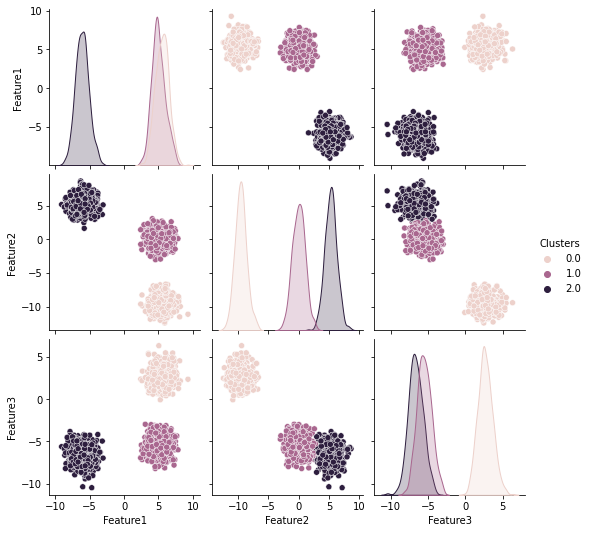

In [34]:
sns.pairplot(features_clusters, hue="Clusters")
# Distributional properties are changing for each cluster over different features. 
# For instance the shape is similar for cluster 0 and 1 based on feature 1

In [35]:
# As data preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Encoding the label rather than float value for clusters
label_encoder = LabelEncoder()
features_clusters["Label"] = label_encoder.fit_transform(features_clusters["Clusters"]) 
features_clusters.head()

,Feature1,Feature2,Feature3,Clusters,Label
0,-6.967649,6.905387,-7.176141,2.0,2
1,5.116272,-10.824642,2.079486,0.0,0
2,4.350676,-10.729127,3.163596,0.0,0
3,5.110332,-11.361409,3.233483,0.0,0
4,-6.162026,4.323892,-7.558292,2.0,2


In [36]:
features_clusters["Label"].value_counts()

1    667
0    667
2    666
Name: Label, dtype: int64

In [80]:
# to check encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

[0.0, 1.0, 2.0]

In [ ]:
# Dropping original clusters column
clases = list(set(features_clusters.Clusters))
features_clusters.drop(["Clusters"], axis=1, inplace=True)
features_clusters.head()

In [ ]:
# Locating features and label as X and y for the rest
X, y = features_clusters.iloc[: , :-1], features_clusters.iloc[: , -1]

In [39]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [59]:
#Since we used test size as 0.3, totally 1400 observations in train set, 600 in test set
print(X_train.shape)
print(X_test.shape)

(1400, 3)
(600, 3)


In [75]:
# Applying decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=10)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train, y_train))
print("Accuracy of test:",clf.score(X_test, y_test))
# It seems that we have overfitting problems

Accuracy of train: 1.0
Accuracy of test: 1.0


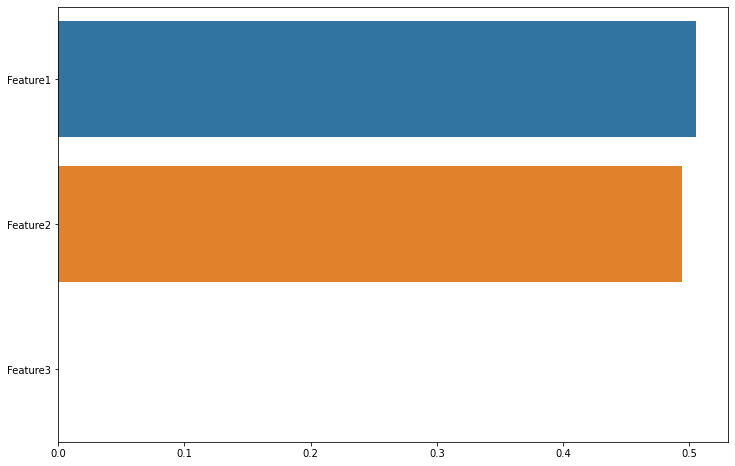

In [82]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()
# Feature 3 does not seem so important for the clusters

In [89]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
# Predicted labels 
print(pred)
# Classification report including precision, recall, f1-score
print(classification_report(y_test,pred))

[0 1 2 0 0 0 1 1 2 0 1 1 2 1 1 1 0 1 1 0 1 0 0 2 0 2 1 2 1 2 0 0 1 0 0 2 0
 2 1 0 2 1 2 1 2 1 1 1 0 2 2 0 1 0 2 0 1 0 1 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1
 1 0 2 0 0 0 2 0 2 2 2 0 1 0 1 0 2 1 1 2 1 0 1 0 1 2 1 2 2 2 1 0 0 0 1 2 1
 0 0 2 1 0 1 1 1 2 2 1 1 0 1 2 0 2 2 2 2 2 2 0 2 2 0 0 2 1 2 0 2 1 0 1 1 0
 1 0 2 1 0 0 1 0 2 0 1 0 2 0 2 2 0 0 2 0 2 2 1 0 1 0 2 1 1 1 0 0 2 0 0 0 1
 2 0 1 1 0 1 1 0 1 0 0 0 2 0 2 1 1 1 2 0 0 2 0 1 1 2 0 1 1 2 0 2 1 0 1 0 2
 2 0 0 0 0 0 1 2 0 1 0 2 0 2 1 2 1 2 1 0 2 1 1 2 2 1 2 2 2 0 2 0 2 2 0 0 1
 1 0 2 1 1 0 2 0 0 2 1 2 2 2 1 1 0 1 1 2 0 0 1 1 2 0 2 0 0 1 1 2 0 0 2 1 1
 1 1 2 2 1 2 1 1 1 2 2 2 0 2 2 0 0 1 1 2 0 1 0 0 1 2 2 2 1 2 0 2 2 2 1 1 2
 1 0 2 0 2 1 2 1 0 0 0 1 1 0 1 1 1 1 2 1 1 0 1 0 1 2 2 2 1 0 0 0 1 0 1 1 2
 1 2 0 0 1 1 2 2 1 1 2 1 1 0 0 1 0 2 2 2 0 1 1 2 1 0 0 2 1 2 2 1 0 1 1 0 1
 2 0 2 0 2 1 0 0 0 2 1 1 0 1 0 2 1 0 0 2 0 2 0 0 1 0 2 0 2 2 1 2 2 1 1 0 2
 0 2 1 1 1 0 1 0 0 0 2 0 2 0 2 0 2 0 0 1 1 2 1 1 2 1 2 0 1 1 2 1 1 0 2 1 2
 0 0 2 1 1 2 0 1 0 2 0 2 

In [52]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


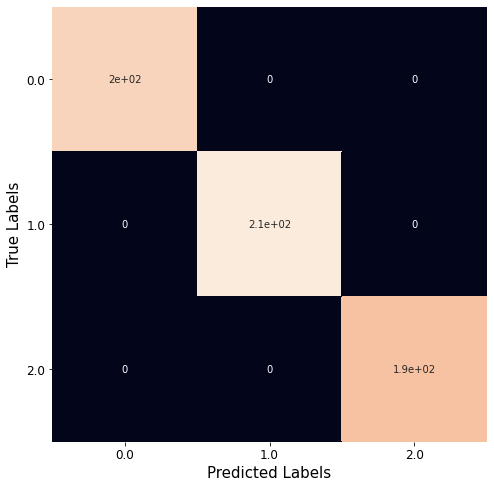

In [83]:
# To get the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [78]:
# Instead of Decision tree classifier lets focus on XGBoost Algorithm
import xgboost as xgb
# train data matrix
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
# test data matrix
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

# Predefined parameters for XGBoost modeling
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [84]:
categories

[0.0, 1.0, 2.0]

In [ ]:
preds = model.predict(dmatrix_test)
preds[:10]

best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

In [87]:
# Checking the metrics 
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [88]:
# Tuning the model hyperparameters via gridsearchCV

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

# Try different combinations of parameters 
param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10}
Mean of the cv scores is 1.000000
Train Score 1.000000
Test Score 1.000000
Seconds used for refitting the best model on the train dataset: 0.032366


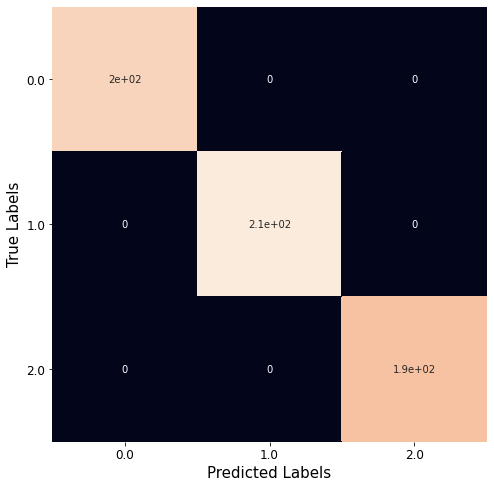

In [92]:
#The best model is suggested as the one having max_depth = 3

#Plotting the confusion matrix again 
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

It seems that, because of the data generation, both decision tree and XGBoost algorithms resulted in the perfect accuracy but if I am not mistaken, these results are certain clues for the overfitting problem. 
It requires to overcome imbalance problem of labels first and then models should be rebuild later.  